In [37]:
# 23wallen
# Project 1
# 2/2/23

import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn
import seaborn as sns

# get the ML libraries

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# now the dataset

url = "StockX-Data-Contest-2019-3.csv"
# names = []
# column (i am told columns are called "classes"? or is it "features"? upadte: they're called attributes I guess -
# individual data points are called "observations) names, empty for now until can see the data
names = ['order-date', 'brand', 'name', 'sale-price', 'retail-price', 'release-date', 'size', 'buyer-city']
# i saw the data so i filled in attribute names
dataset = read_csv(url, names=names)
# ok now some of the data won't be able to be visualized since it has characters like $ for prices
# and characters like / in dates. so i am going to make the data numerical

#look at data before converting stuff
print(dataset.shape)
print(dataset.head(20))

# strip dollar sign from price attributes
dataset['sale-price'] = dataset["sale-price"].str.replace("$", "").str.replace(",", "").astype(int)
dataset["retail-price"] = dataset["retail-price"].str.replace("$", "").str.replace(",", "").astype(int)

# for the dates, we have to make a system for them to be numerical. so we can use
# numerical ANALYSIS. my system is going to be days since
# january 1st 2000, because why not

dataset['order-date'] = pd.to_datetime(dataset['order-date']).apply(lambda x: x.toordinal() - pd.to_datetime("1/1/2000").toordinal())
dataset['release-date'] = pd.to_datetime(dataset['release-date']).apply(lambda x: x.toordinal() - pd.to_datetime("1/1/2000").toordinal())

print(dataset.shape)
print(dataset.head(20))

(99956, 8)
   order-date   brand                                           name  \
0      9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1      9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2      9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3      9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4      9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
5      9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
6      9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-White   
7      9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
8      9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
9      9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
10     9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
11     9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
12     9/1/17   Yeezy          Adidas-Yeezy-Boost-350

/var/folders/jk/gltwp6353fn8b8807f7jcksm0000gq/T/ipykernel_32082/3492341373.py:49: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['sale-price'] = dataset["sale-price"].str.replace("$", "").str.replace(",", "").astype(int)
/var/folders/jk/gltwp6353fn8b8807f7jcksm0000gq/T/ipykernel_32082/3492341373.py:50: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset["retail-price"] = dataset["retail-price"].str.replace("$", "").str.replace(",", "").astype(int)


(99956, 8)
    order-date   brand                                           name  \
0         6453   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1         6453   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2         6453   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3         6453   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4         6453   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
5         6453   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
6         6453   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-White   
7         6453   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
8         6453   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
9         6453   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
10        6453   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
11        6453   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
12        6453   Yeezy          Adidas-Y

In [38]:
# ok, the data looks nice. now we shall look at some more stats
print(dataset.describe())
print(dataset.groupby('order-date').size())
print(dataset.groupby('brand').size())
print(dataset.groupby('name').size())
print(dataset.groupby('sale-price').size())
print(dataset.groupby('retail-price').size())
print(dataset.groupby('release-date').size())
print(dataset.groupby('size').size())
print(dataset.groupby('buyer-city').size())

         order-date    sale-price  retail-price  release-date          size
count  99956.000000  99956.000000   99956.00000  99956.000000  99956.000000
mean    6798.892253    446.634719     208.61359   6615.183531      9.344181
std      144.123103    255.982969      25.20001    235.279580      2.329588
min     6453.000000    186.000000     130.00000   5656.000000      3.500000
25%     6696.000000    275.000000     220.00000   6461.000000      8.000000
50%     6841.000000    370.000000     220.00000   6559.000000      9.500000
75%     6923.000000    540.000000     220.00000   6789.000000     11.000000
max     6983.000000   4050.000000     250.00000   6977.000000     17.000000
order-date
6453     23
6454     15
6455     16
6456     17
6457     22
       ... 
6979    346
6980    303
6981    445
6982    404
6983    348
Length: 531, dtype: int64
brand
 Yeezy       72162
Off-White    27794
dtype: int64
name
Adidas-Yeezy-Boost-350-Low-Moonrock                    100
Adidas-Yeezy-Boost-350-Low

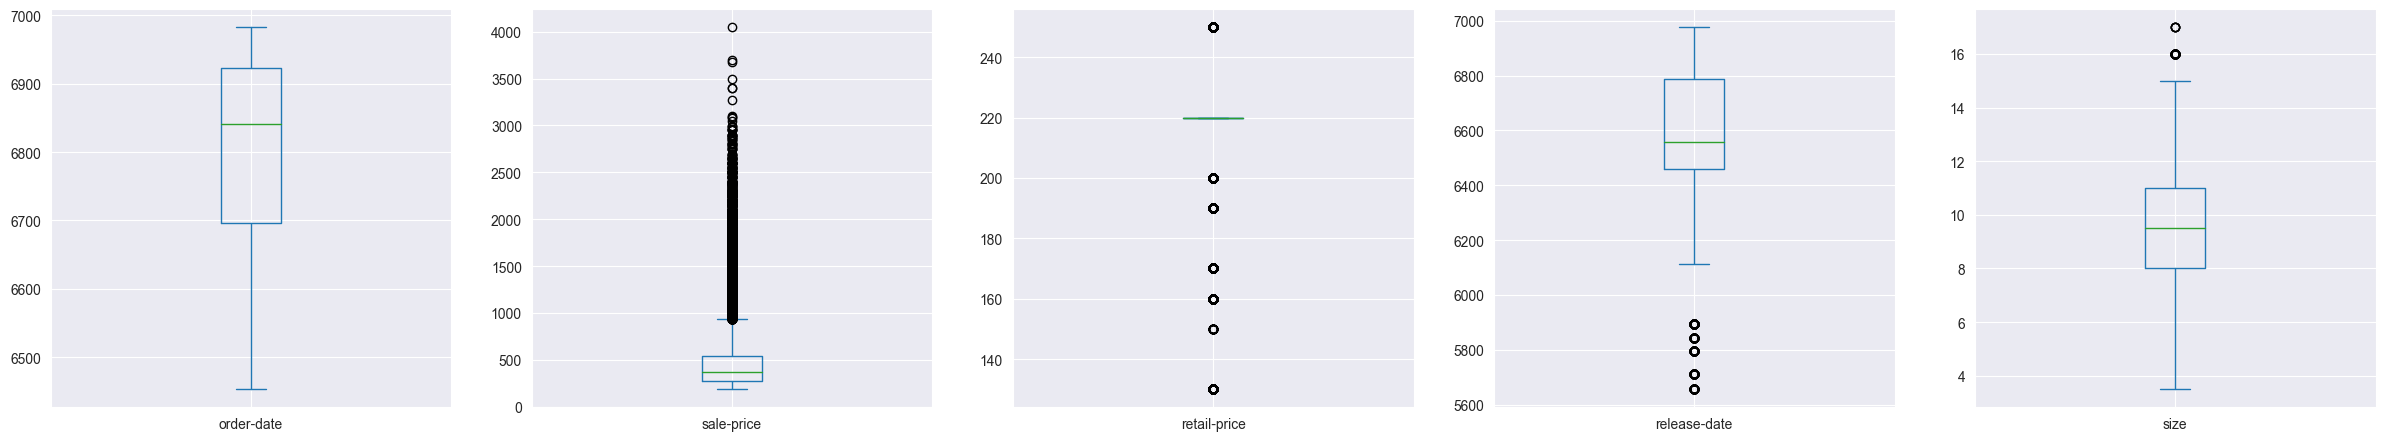

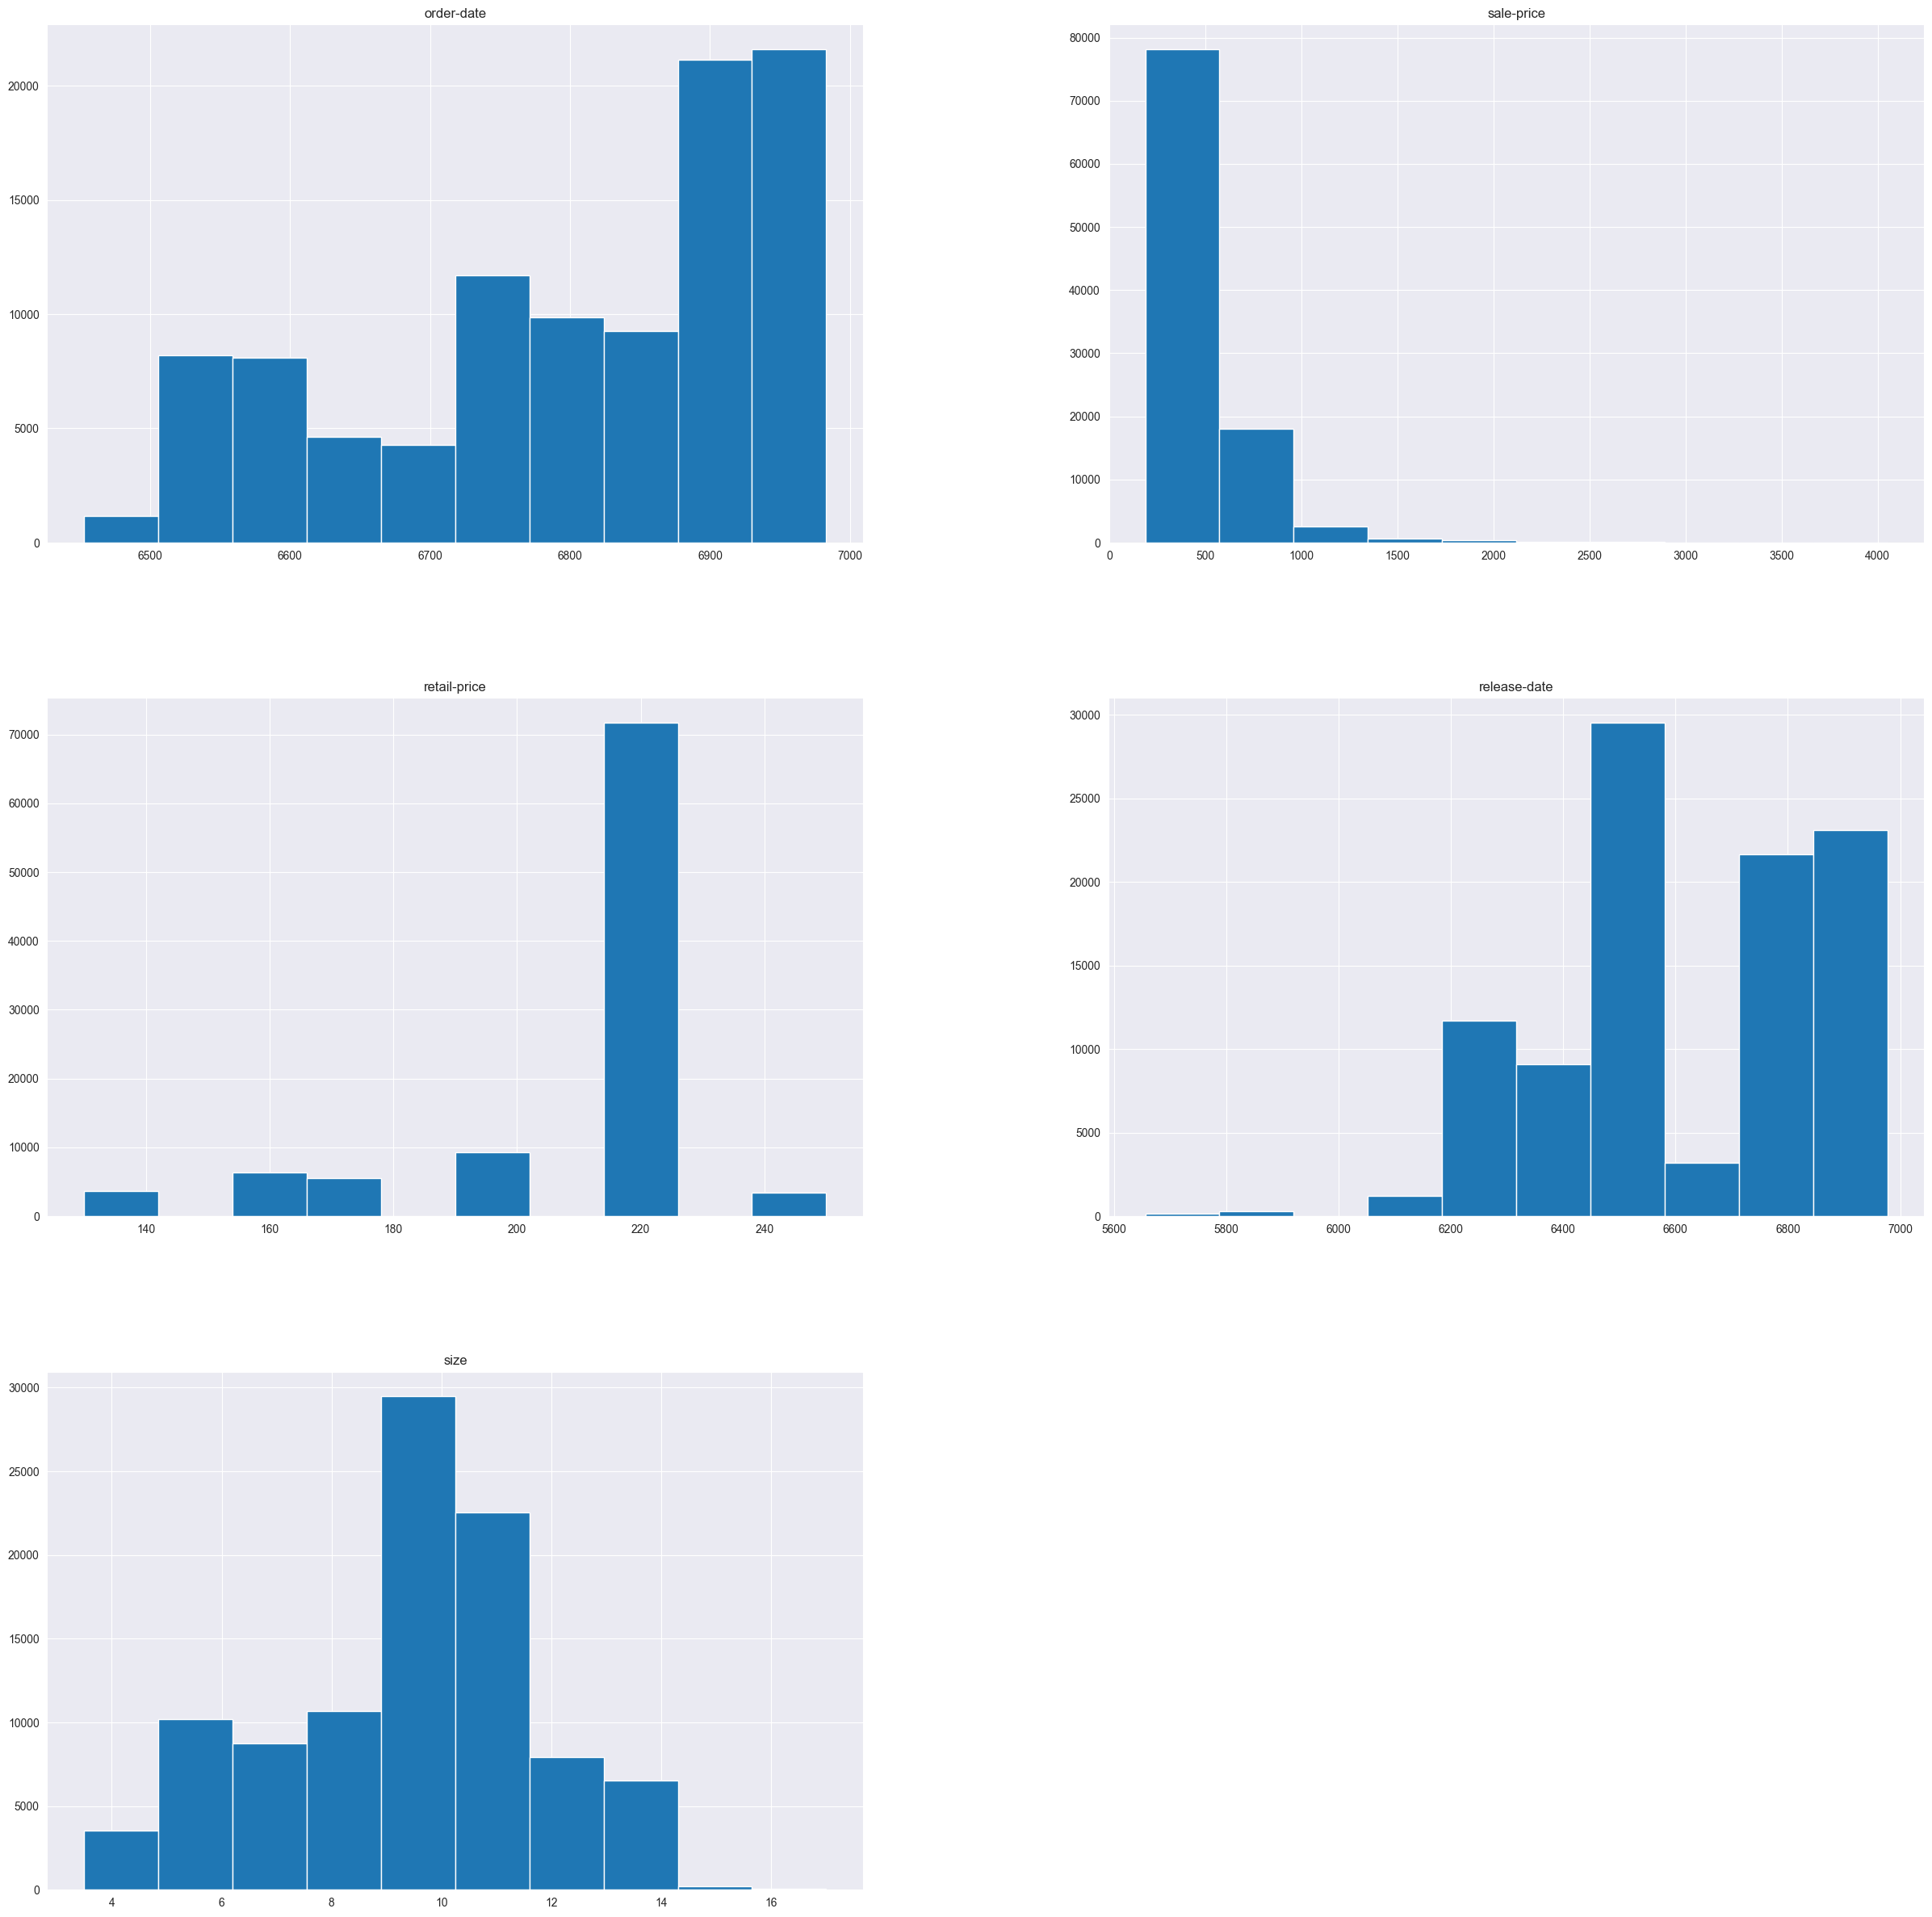

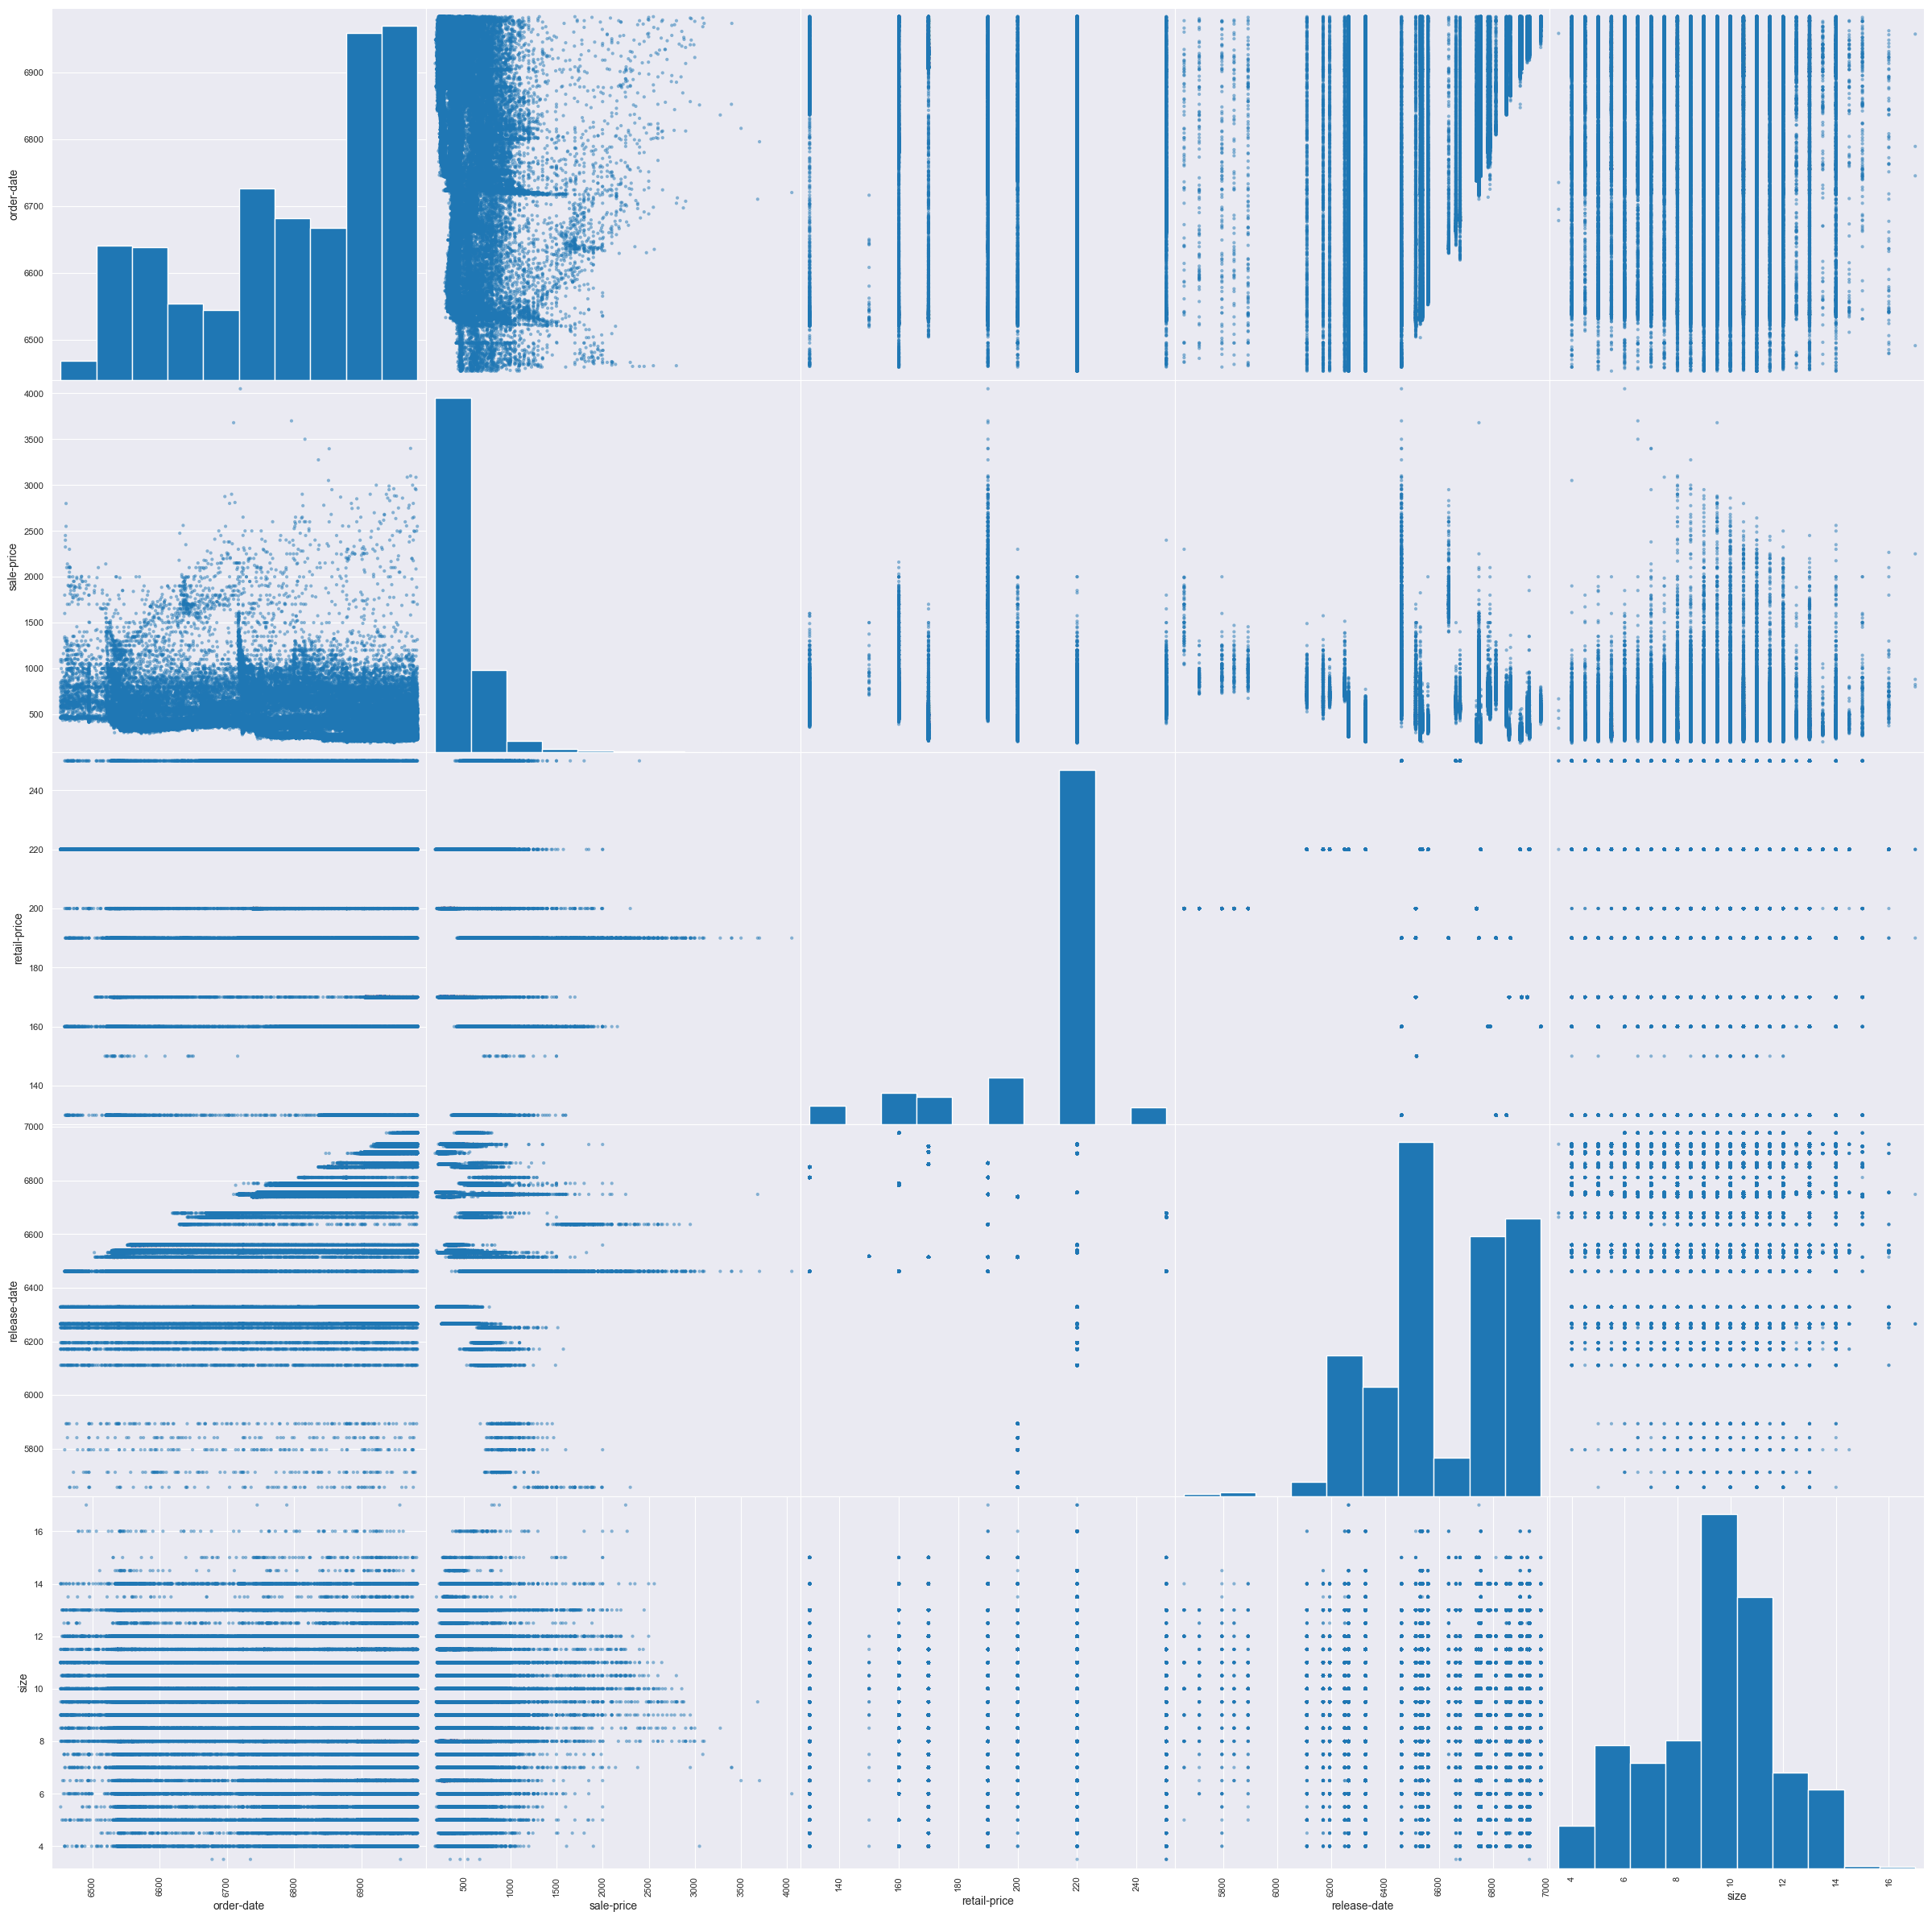

In [39]:
# hmm, the shoe with the most sales are the butter yeezys, which is weird because nobody likes them. Anyway
# second and third place go to beluga and zebra yeezys. lotta yeezys
# also the retail price is disproportionally $220, which is the retail price for yeezys
# release dates follow the most sold models
# sizes 9-11 most popular
# California had most sales by far

# now lets graph stuff
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(30,30))
dataset.hist(figsize=(30,30))
pyplot.show()
scatter_matrix(dataset, figsize=(30,30))
pyplot.show()

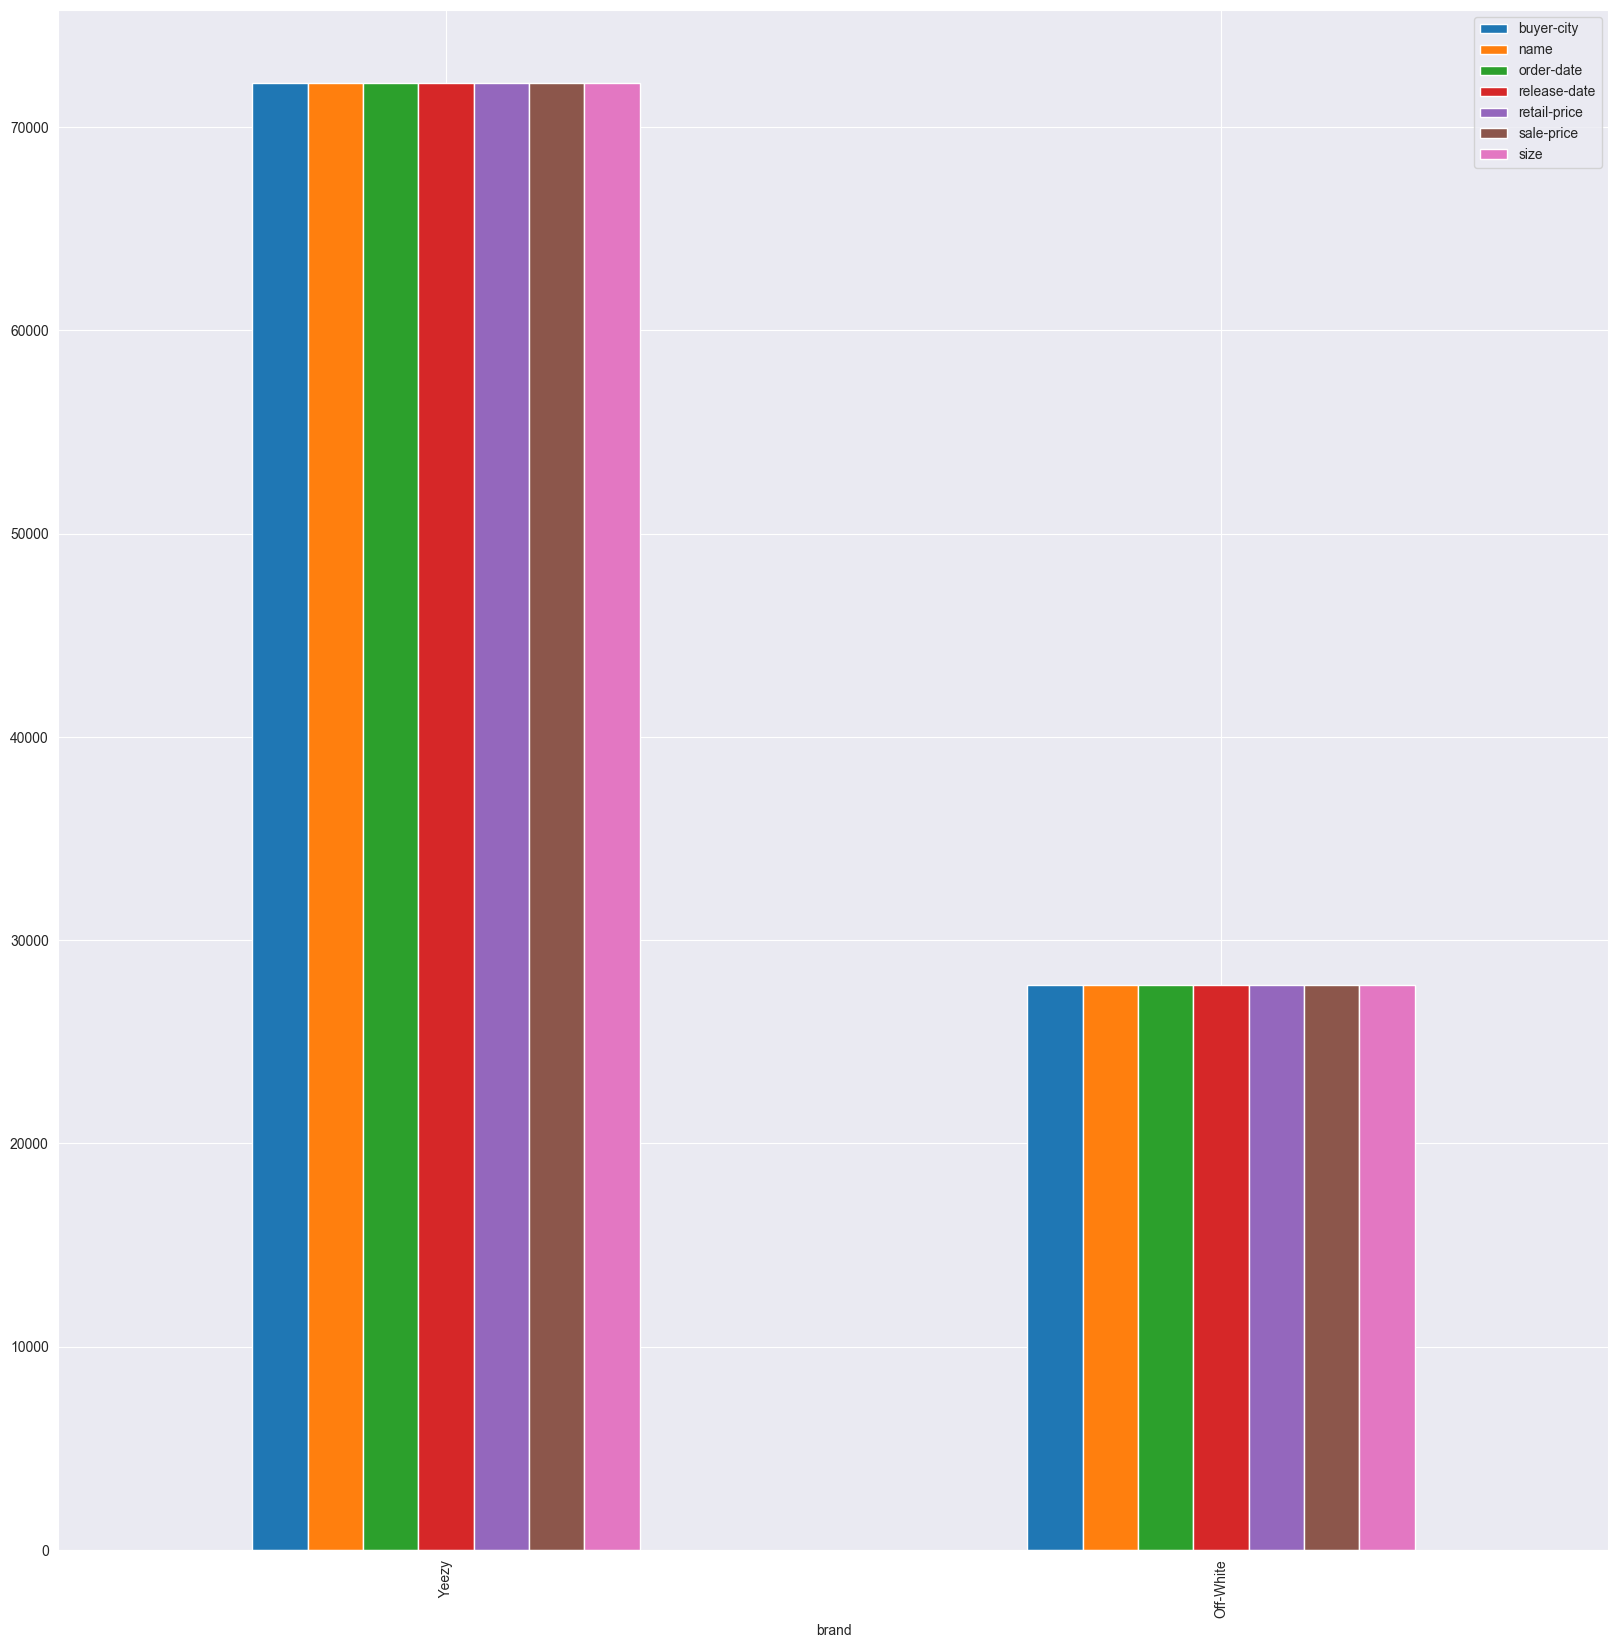

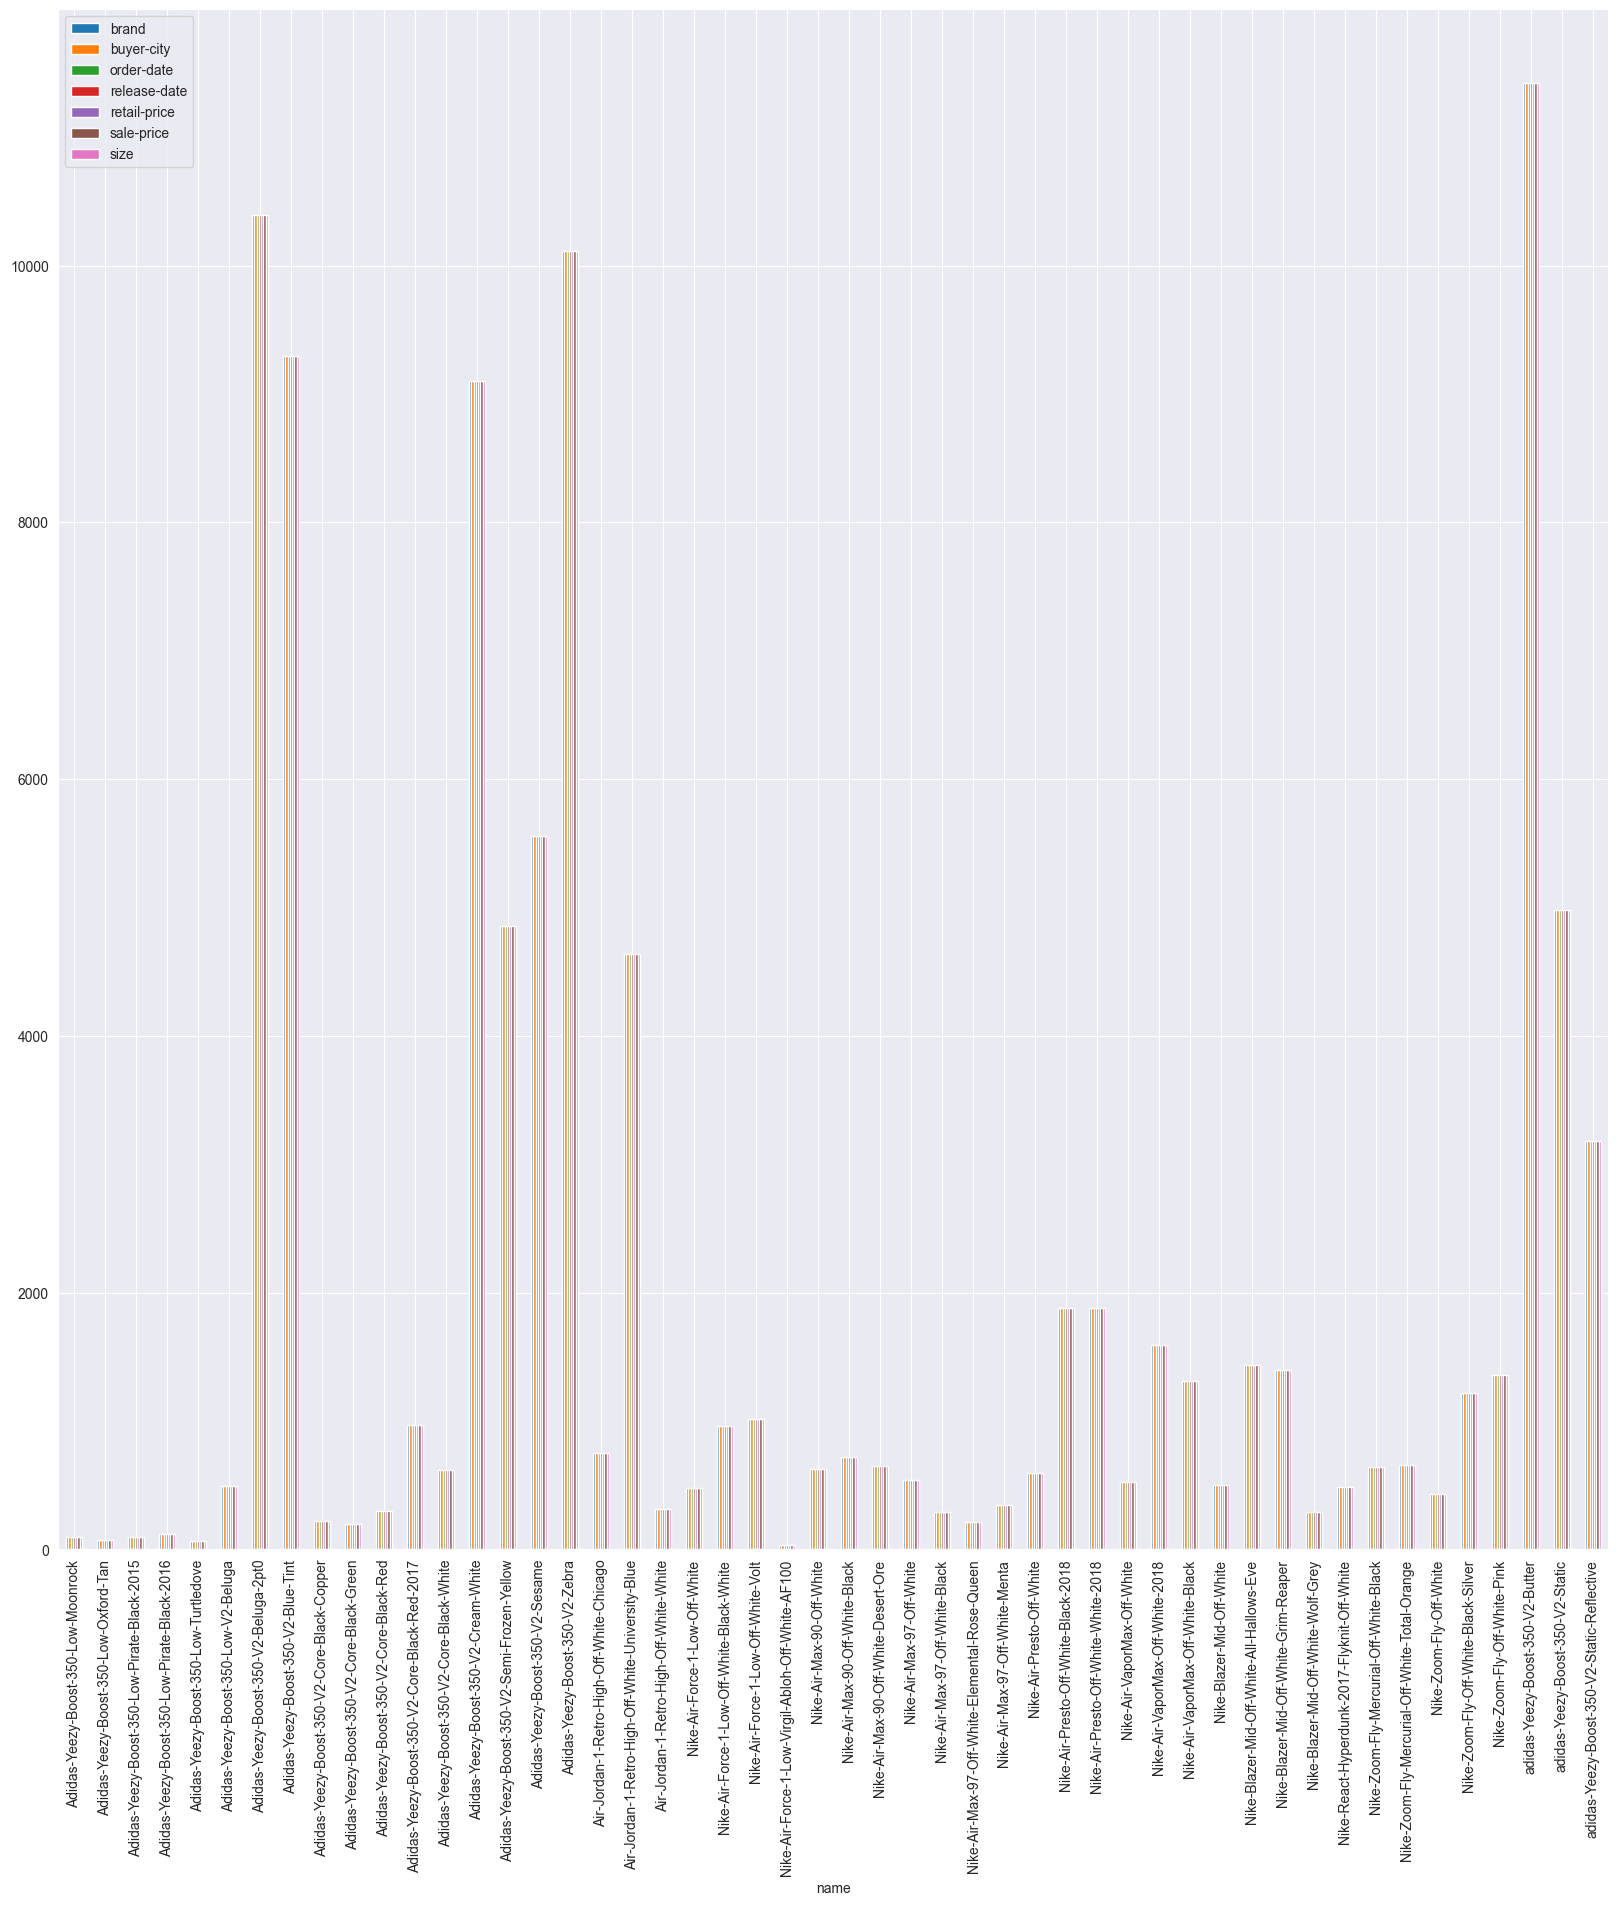

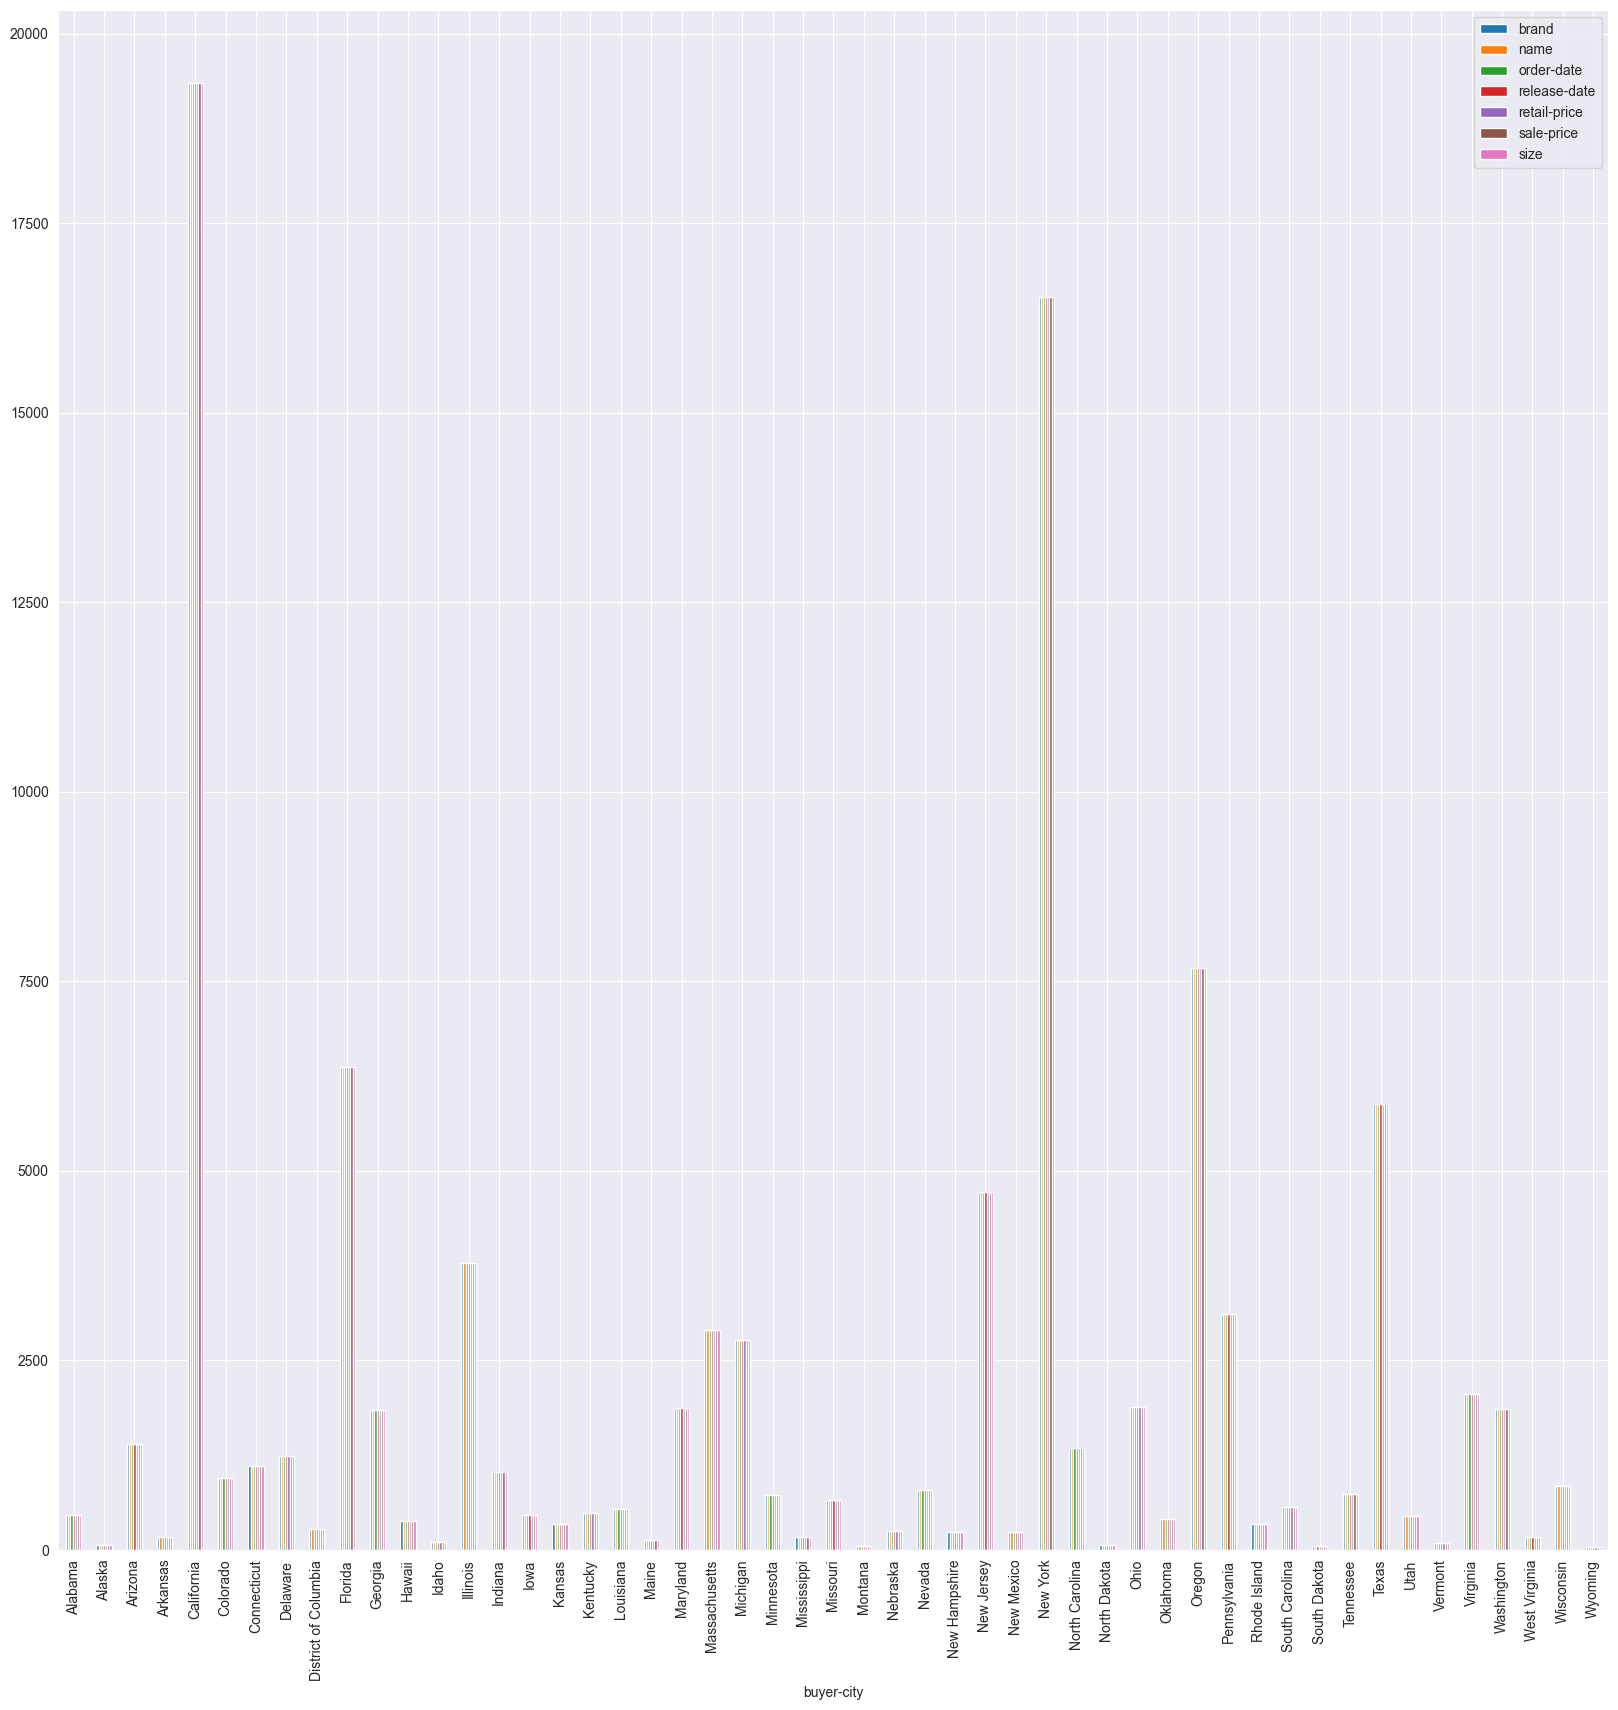

In [40]:
# that only works for the sales and dates data since it's numerical
# more graphs for non-numerical data

dataset.pivot_table(index="brand", aggfunc=len).plot(kind="bar", figsize = (10,10))
pyplot.show()
dataset.pivot_table(index="name", aggfunc=len).plot(kind="bar", figsize = (20,20))
pyplot.show()
dataset.pivot_table(index="buyer-city", aggfunc=len).plot(kind="bar", figsize = (20,20))
pyplot.show()

In [41]:
# splitting the data
# we are going to have the model predict the 'name' attribute of the shoes
# using only the numerical attributes (so excluding brand and city) since i don't know
# how to use algorithms for non-numerical data (is that possible?)
jarray = dataset.values
# note: the 1st version of code below includes the release date data-
# this makes the models incredibly accurate (98%) since it's basically a cheat code.
# like, if the models know when the shoes were released, they have a pretty simple
# range of sale values and can easily predict the shoe name. So
# for the second version i took that data out, and the model is now only 83% accurate.
# based on the date sold, sale price, size, and retail price

# james = jarray[:, [0,3,4,6]]
james = jarray[:, [0,3,4,6]]
bond = jarray[:,2]
James_Train, James_Validation, Bond_Train, Bond_Validation = train_test_split(james, bond, test_size = 0.2, random_state =1)
# adding algorithms to test
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluating accuracy of each model
# WARNING: this code takes pretty long to load (like 2-5 minutes)
# because I'm using 10 splits for over 40,000 observations
# but the (classified) models are very super accurate so that's cool
# the linear ones are quite inaccurate (expected based on the scatterplots)
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, James_Train, Bond_Train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.340691 (0.004178)
LDA: 0.354397 (0.002427)
KNN: 0.783815 (0.003716)
CART: 0.827535 (0.002994)
NB: 0.550885 (0.003493)


In [42]:
# most accurate model = CART
model = DecisionTreeClassifier()
model.fit(James_Train, Bond_Train)
# predicting test data
predictions = model.predict(James_Validation)
# how accurate
print(accuracy_score(Bond_Validation, predictions))
# confusion matrix (truncated)
print(confusion_matrix(Bond_Validation, predictions))
# total classifications
print(classification_report(Bond_Validation, predictions))

0.8323829531812725
[[  10    2    2 ...    0    0    0]
 [   1    5    1 ...    0    0    0]
 [   5    3    8 ...    0    0    0]
 ...
 [   0    0    0 ... 1989    4    0]
 [   0    0    0 ...    3  843    0]
 [   0    0    0 ...    0    0  588]]
                                                   precision    recall  f1-score   support

              Adidas-Yeezy-Boost-350-Low-Moonrock       0.48      0.59      0.53        17
            Adidas-Yeezy-Boost-350-Low-Oxford-Tan       0.33      0.42      0.37        12
     Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015       0.53      0.44      0.48        18
     Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016       0.53      0.36      0.43        22
            Adidas-Yeezy-Boost-350-Low-Turtledove       0.77      0.83      0.80        12
             Adidas-Yeezy-Boost-350-Low-V2-Beluga       0.51      0.38      0.43       113
            Adidas-Yeezy-Boost-350-V2-Beluga-2pt0       0.83      0.84      0.84      2040
              Adidas-Yee